In [6]:
import os

In [7]:
# !hydromt --models

In [8]:
dir_run = os.path.join('..','computations','sfincs_test_CLI')

In [9]:
# For more information on command line available options, type:
# !hydromt build --help

In [11]:
!hydromt build sfincs ../computations/sfincs_test_CLI --region "{'bbox': [34.33,-20.12,34.95,-19.30]}" -i sfincs_base_build.yml --force-overwrite -v

2024-10-25 12:44:30,022 - build - log - INFO - HydroMT version: 0.10.0
2024-10-25 12:44:30,023 - build - main - INFO - Building instance of sfincs model at C:\SnapVolumesTemp\MountPoints\{45c63495-0000-0000-0000-100000000000}\{F1855C36-0FD3-4197-A97E-4AB8346F3786}\SVROOT\git\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI.
2024-10-25 12:44:30,023 - build - main - INFO - User settings:
2024-10-25 12:44:30,173 - build - data_catalog - INFO - Parsing data catalog from C:\SnapVolumesTemp\MountPoints\{45c63495-0000-0000-0000-100000000000}\{F1855C36-0FD3-4197-A97E-4AB8346F3786}\SVROOT\git\COMPASS\SFINCS\datacatalog.yml
2024-10-25 12:44:30,515 - build - model_api - WARNING - Model dir already exists and files might be overwritten: C:\SnapVolumesTemp\MountPoints\{45c63495-0000-0000-0000-100000000000}\{F1855C36-0FD3-4197-A97E-4AB8346F3786}\SVROOT\git\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI\gis.
2024-10-25 12:44:30,517 - build - model_api - INFO - Initializing sfincs 

In [7]:
dir_list = os.listdir(dir_run)
print(dir_list)

['gis', 'hydromt.log', 'hydromt_data.yml', 'sfincs.dep', 'sfincs.dis', 'sfincs.ind', 'sfincs.inp', 'sfincs.msk', 'sfincs.scs', 'sfincs.src']


In [6]:
from hydromt_sfincs import SfincsModel

# read the model with hydromt methods
sf = SfincsModel(root=dir_run, mode="r")
sf.read()

OSError: .ind path c:\git\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI\sfincs.ind does not exist

ValueError: cannot convert float NaN to integer

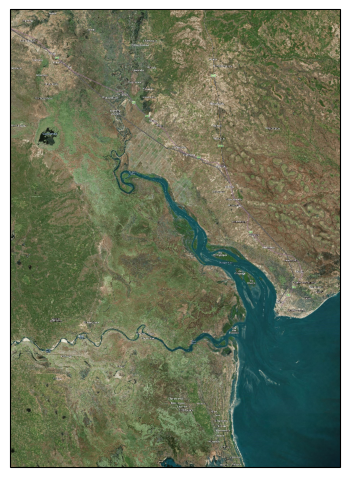

In [9]:
# plot the model with satelite basemap (see hydromt_sfincs.plot_basemap for more options)
_ = sf.plot_basemap(plot_region=True, bmap="sat", zoomlevel=12)